<a href="https://colab.research.google.com/github/KunalGit875/Stock-Market-Predictor/blob/main/Stock_Market_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Shape of the dataset:
(506, 14)

Data types of each column:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

Missing values in the datas

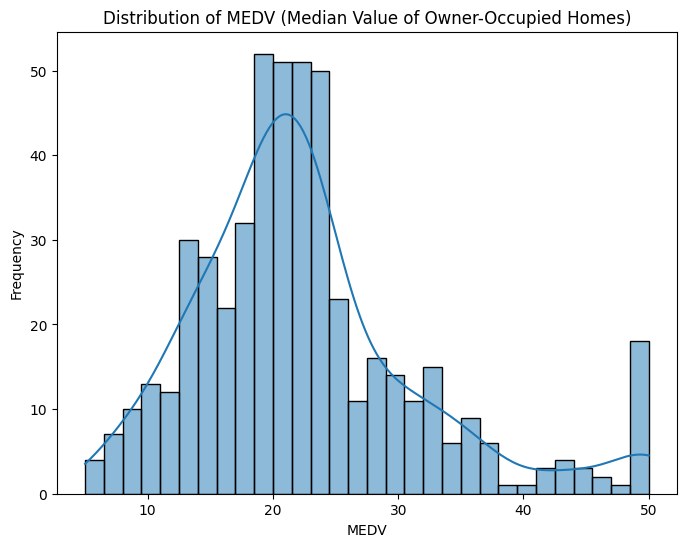

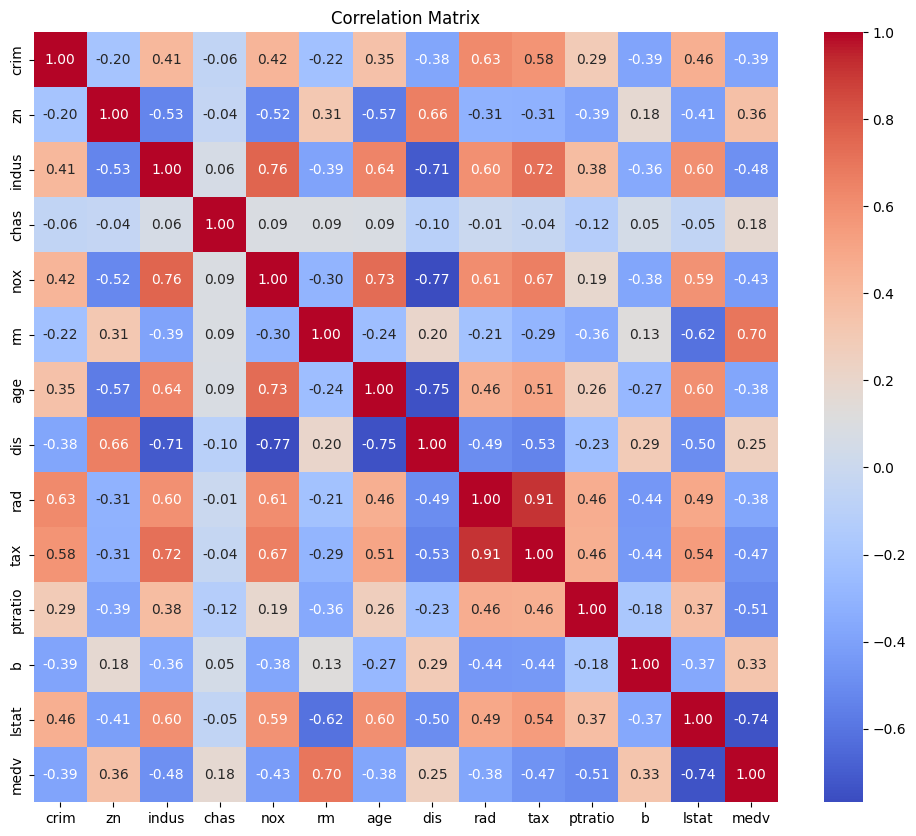

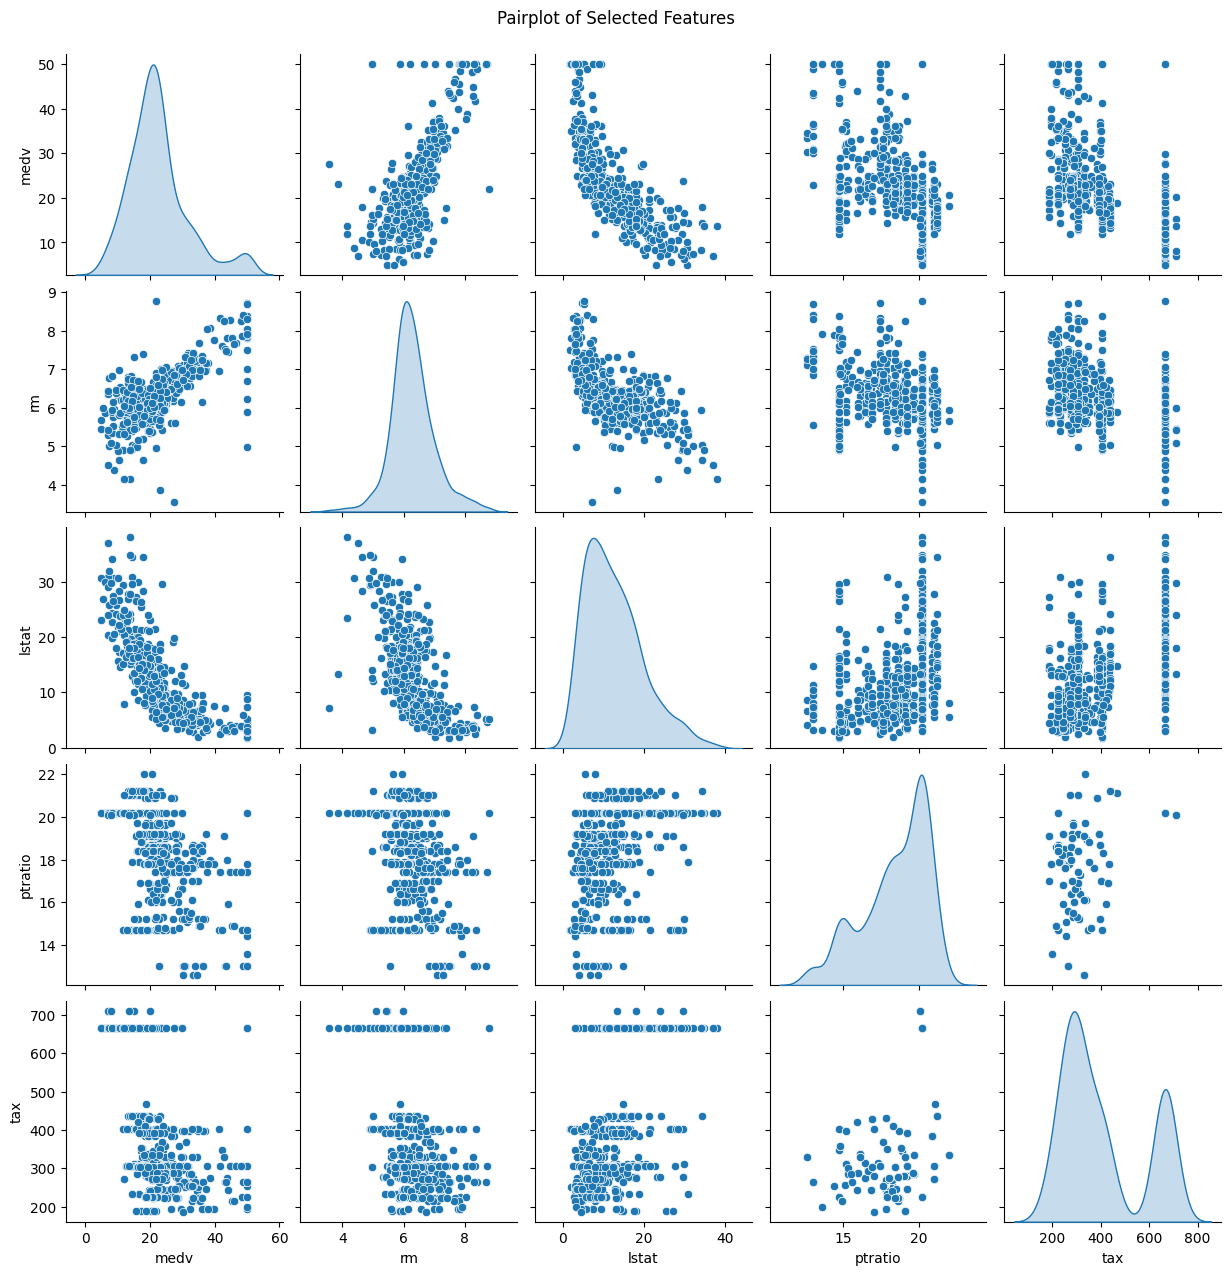


Number of duplicate rows: 0

Shape of the dataset after cleaning:
(415, 14)

Missing values in the dataset after cleaning:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

First 5 rows of the cleaned dataset:
       crim        zn     indus  chas       nox        rm       age       dis  \
0 -0.500097  0.427278 -1.254663   0.0 -0.083120  0.505986 -0.077906  0.120954   
1 -0.495805 -0.488581 -0.553675   0.0 -0.708718  0.253585  0.410713  0.567909   
2 -0.495810 -0.488581 -0.553675   0.0 -0.708718  1.505755 -0.224135  0.567909   
3 -0.494771 -0.488581 -1.273808   0.0 -0.808451  1.199269 -0.769819  1.125951   
4 -0.487272 -0.488581 -1.273808   0.0 -0.808451  1.443474 -0.470228  1.125951   

        rad       tax   ptratio         b     lstat      medv  
0 -0.938612 -0.607776 -1.483794  0.439914 -1.128221  0.204028  
1 -0.816465 -0.943176 -0.312

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



data = pd.read_csv('/BostonHousing.csv')
print(data.head())

print("\nShape of the dataset:")
print(data.shape)

print("\nData types of each column:")
print(data.dtypes)

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())

print("\nDescriptive statistics of the dataset:")
print(data.describe())

# Distribution of the MEDV
plt.figure(figsize=(8, 6))
sns.histplot(data['medv'], kde=True, bins=30)
plt.title('Distribution of MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Visualize correlations between features using a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for a subset of features
subset_features = ['medv', 'rm', 'lstat', 'ptratio', 'tax']
sns.pairplot(data[subset_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()
data.fillna(data.median(), inplace=True)

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    data.drop_duplicates(inplace=True)

#Removing outliers based on Z-score (values that are more than 3 standard deviations away)
z_scores = np.abs((data - data.mean()) / data.std())
data = data[(z_scores < 3).all(axis=1)]

# Scaling features to have mean=0 and variance=1 (standardization)
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nShape of the dataset after cleaning:")
print(scaled_data.shape)

print("\nMissing values in the dataset after cleaning:")
print(scaled_data.isnull().sum())


print("\nFirst 5 rows of the cleaned dataset:")
print(scaled_data.head())
# Making the Training and Testing datasets
# Independent Variables
X = data.drop(columns=['medv'])
# Dependent Variable
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("\nTraining data shape (X_train):", X_train.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Testing labels shape (y_test):", y_test.shape)
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the model's coefficients
print("\nModel coefficients:", model.coef_)
print("\nModel intercept:", model.intercept_)

# Print the evaluation metrics
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R^2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optional: Compare actual vs predicted values for the first few test samples
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted values:")
print(comparison.head())

In [ ]:
# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"\nRidge Regression - R-squared (R^2) Score: {r2_ridge}")

# Print the model's coefficients
print("\nRidge Regression Model coefficients:", ridge_model.coef_)
print("\nRidge Regression Model intercept:", ridge_model.intercept_)

Ridge Regression - Root Mean Squared Error (RMSE): 3.2712349009242216

Ridge Regression - R-squared (R^2) Score: 0.7744408943091134

Ridge Regression Model coefficients: [-1.59610791e-01 -2.39625709e-03 -1.87482072e-02  0.00000000e+00
 -5.53741944e+00  5.00424118e+00 -2.04248387e-02 -1.04368107e+00
  2.10342047e-01 -1.11933606e-02 -8.75043178e-01  3.76181451e-03
 -4.71725198e-01]

Ridge Regression Model intercept: 23.224176354367124


In [ ]:
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model's performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print(f"Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso Regression - R-squared (R^2) Score: {r2_lasso}")

# Print the model's coefficients
print("Lasso Regression Model coefficients:", lasso_model.coef_)
print("Lasso Regression Model intercept:", lasso_model.intercept_)


Lasso Regression - Root Mean Squared Error (RMSE): 3.97948041041914
Lasso Regression - R-squared (R^2) Score: 0.6661974544992475
Lasso Regression Model coefficients: [-0.00000000e+00  4.38981277e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  8.75081608e-01  1.62667149e-02 -3.31467760e-01
  1.52688880e-01 -1.15986132e-02 -7.51542847e-01  3.68218679e-03
 -7.86069843e-01]
Lasso Regression Model intercept: 42.625226690274744


In [ ]:
# Function to calculate adjusted R-squared
def adjusted_r_squared(r_squared, n, k):
    return 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

# Initialize variables to store the best model
best_adj_r2 = -np.inf
best_model = None
best_features = None

# Loop over all possible combinations of predictors
for k in range(1, len(X.columns) + 1):
    for combo in itertools.combinations(X.columns, k):
        X_train_combo = X_train[list(combo)]
        X_train_combo = sm.add_constant(X_train_combo)  # Add constant term for intercept

        model = sm.OLS(y_train, X_train_combo).fit()
        adj_r2 = adjusted_r_squared(model.rsquared, X_train.shape[0], k)

        if adj_r2 > best_adj_r2:
            best_adj_r2 = adj_r2
            best_model = model
            best_features = combo

# Print the best model summary
print(f"Best features: {best_features}")
print(best_model.summary())

# Evaluate on the test set
X_test_best = X_test[list(best_features)]
X_test_best = sm.add_constant(X_test_best)  # Add constant term for intercept
y_pred = best_model.predict(X_test_best)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best Subset Model - RMSE: {rmse}")


Best features: ('crim', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat')
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     99.07
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.77e-87
Time:                        18:19:16   Log-Likelihood:                -954.20
No. Observations:                 332   AIC:                             1928.
Df Residuals:                     322   BIC:                             1966.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [ ]:
# VIF calculation
# Add a constant column to the dataset for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


    Feature         VIF
0     const  735.189691
1      crim    3.248438
2        zn    1.976012
3     indus    3.517102
4      chas         NaN
5       nox    4.498246
6        rm    2.024500
7       age    2.926935
8       dis    3.622134
9       rad    7.508913
10      tax    7.467788
11  ptratio    1.681517
12        b    1.196724
13    lstat    3.247752


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


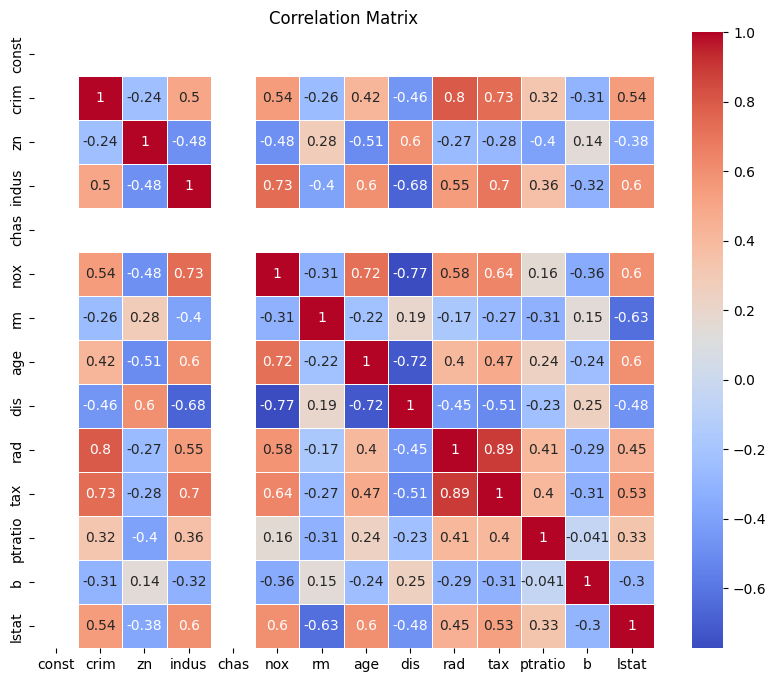

In [ ]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     96.86
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          1.66e-110
Time:                        18:19:17   Log-Likelihood:                -1173.4
No. Observations:                 415   AIC:                             2373.
Df Residuals:                     402   BIC:                             2425.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8424      5.531      4.672      0.0

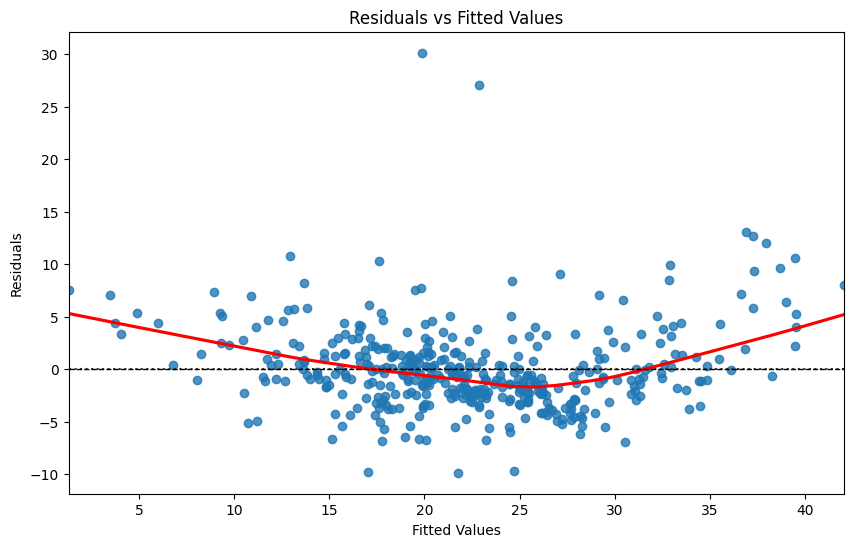

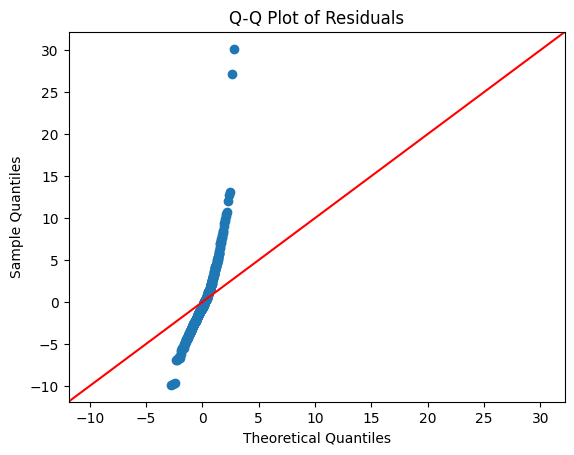

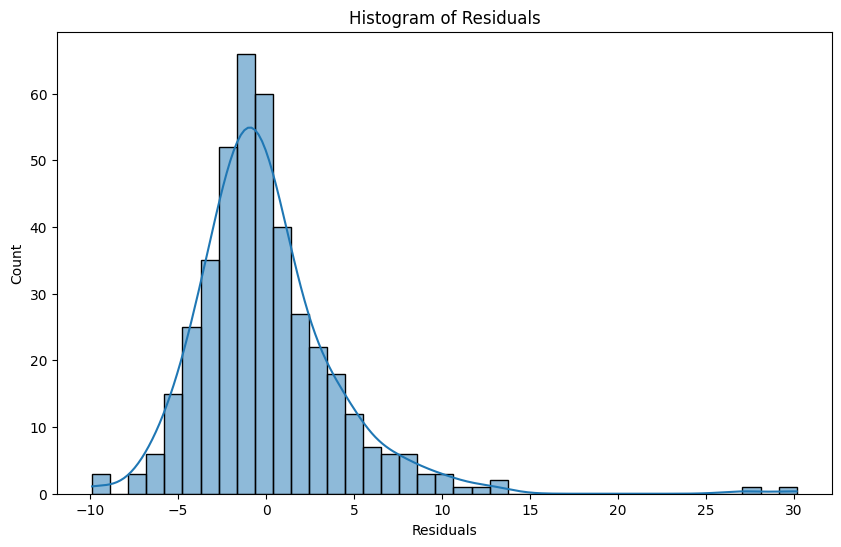

In [ ]:
# Fit the Ordinary Least Squares (OLS) regression model for Hypothesis testing
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())
# Assess the Model assumptions
# Predicted values (fitted values)
fitted_values = model.fittedvalues

# Residuals
residuals = model.resid

# Linearity & Homoscedasticity: Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Normality of Residuals: Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()